## I found a plot showing boxplots of NFL teams' aggregated win percentages by season.  I wanted to re-create this with MLB data.
#### Data is from baseball-reference.com Standings since 1998 (the last expansion, addition of ARI and TBR)

In [17]:
import urllib2
import re
import sys

output = False
index = 0
team_names = list()
luck = list()
ranker = list()
W_Pct = list()
wins=list()
for year in range(1998,2020):
    sys.stdout.write('Getting data for {0} ... '.format(year))
    output = False
    for line in urllib2.urlopen("https://www.baseball-reference.com/leagues/MLB/{0}-standings.shtml".format(year)):
        if 'MLB  Detailed Standings' in str(line):
            output = True
        elif 'More {0} MLB Pages'.format(year) in str(line):
            output = False
        elif output:
            m = re.search(r'data-stat="ranker" >(<strong>)?(?P<Rank>\d+).*?'
                          r'data-stat="team_ID" >.*? title="(?P<title>.*?)">(?P<team>.*?)<.*?'
                          r'data-stat="G" >(<strong>)?(?P<games>\d+).*?data-stat="W" >(<strong>)?(?P<wins>\d+).*?'
                          r'data-stat="L" >(<strong>)?(?P<losses>\d+).*?'
                          r'data-stat="win_loss_perc" >(<strong>)?(?P<Win_Loss_Percentage>\.\d+).*?'
                          r'data-stat="luck_pythag" >(<strong>)?(?P<Luck>-?\d+)', str(line))
            if m is not None:
                index = index+1
                wins.append(int(m.group('wins')))
                luck.append(float(m.group("Luck")))
                ranker.append(int(m.group("Rank")))
                team_names.append(m.group('title'))
                W_Pct.append(float(m.group('Win_Loss_Percentage')))
                #print(year, m.group('team'), m.group('games'), m.group('wins'), m.group('losses'), m.group('title'), m.group('Win_Loss_Percentage'))
    sys.stdout.write('Done\n')
#team_names
#W_Pct
#ranker

Getting data for 1998 ... Done
Getting data for 1999 ... Done
Getting data for 2000 ... Done
Getting data for 2001 ... Done
Getting data for 2002 ... Done
Getting data for 2003 ... Done
Getting data for 2004 ... Done
Getting data for 2005 ... Done
Getting data for 2006 ... Done
Getting data for 2007 ... Done
Getting data for 2008 ... Done
Getting data for 2009 ... Done
Getting data for 2010 ... Done
Getting data for 2011 ... Done
Getting data for 2012 ... Done
Getting data for 2013 ... Done
Getting data for 2014 ... Done
Getting data for 2015 ... Done
Getting data for 2016 ... Done
Getting data for 2017 ... Done
Getting data for 2018 ... Done
Getting data for 2019 ... Done


Populating the interactive namespace from numpy and matplotlib


C:\Users\Thomas\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['boxplot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


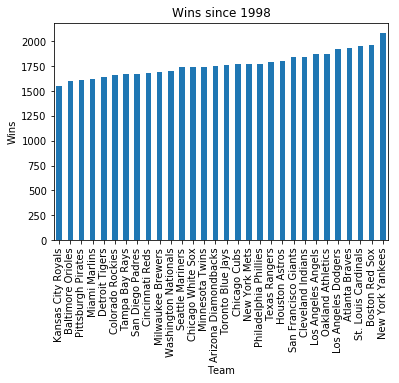

In [18]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
idx=index
df=pd.DataFrame(index=range(0,idx))
df['W_Pct'] = pd.Series(W_Pct)
df['W_Pct'] = df['W_Pct']*100.0
df['Team'] = pd.Series(team_names)
df['Luck'] = pd.Series(luck)
df['Rank'] = pd.Series(ranker)
df['W'] = pd.Series(wins)

#we have to re-name some of the teams that changed names within the same franchise
df=df.replace('Florida Marlins','Miami Marlins')
df=df.replace('Tampa Bay Devil Rays','Tampa Bay Rays')
df=df.replace('Anaheim Angels','Los Angeles Angels')
df=df.replace('Los Angeles Angels of Anaheim','Los Angeles Angels')
df=df.replace('Montreal Expos','Washington Nationals')

plt = df.groupby(['Team'])['W'].agg(sum).sort_values().plot(kind='bar')
title('Wins since 1998')
plt.set_xlabel("Team")
plt.set_ylabel('Wins')

from matplotlib import pyplot as plt
plt.savefig('mlb_wins_since_1998.png')


#### This is a test of the data to see if it seems right.  I summed up all the wins from 1998-2019.  The Yankees and Red Sox are the two best teams, while the two worst are the Royals and Orioles.  Makes sense (sorry Royals and Orioles fans).

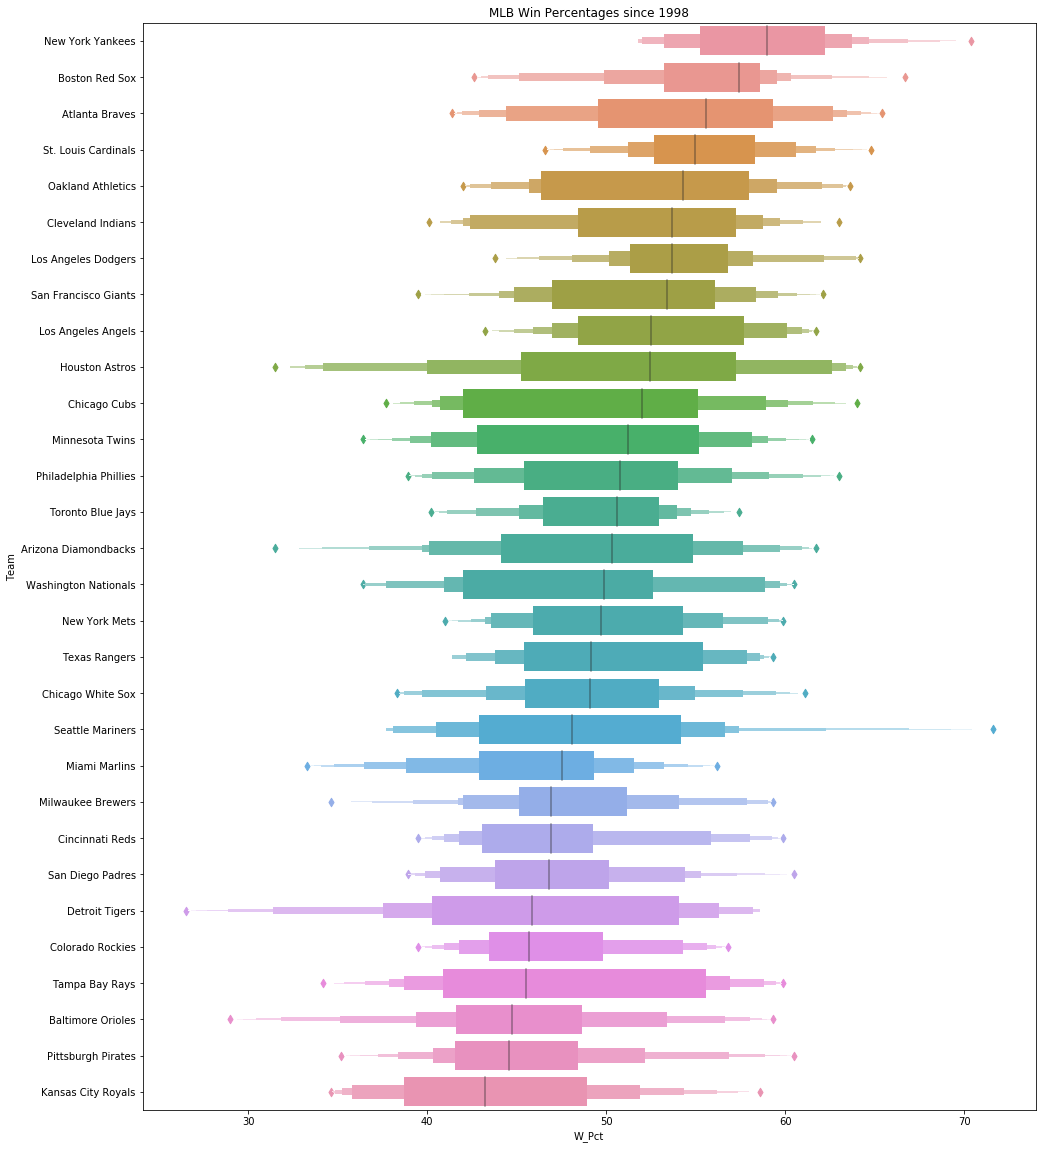

In [19]:

import seaborn as sns




fig, ax = pyplot.subplots(figsize=(16,20))

#df['Team'].value_counts()
my_order = df.groupby(by=['Team'])['W_Pct'].median().sort_values(ascending=False).index
boxplot = sns.boxenplot(data = df,x='W_Pct',y='Team', order=my_order)
title('MLB Win Percentages since 1998')
fig = boxplot.get_figure()
fig.savefig('MLB Win Percentage Since 1998')




### This is exactly what I wanted!  The Yankees and Red Sox seem to be the dominant teams, while the Royals, Pirates, and Orioles are among the worst.  Makes sense.
### But now I'm curious.  Baseball-Reference gives a "Luck" category, based on team's performance relative to their Pythagorean, or expected, win-loss record.  I'm curious to see if teams at the top are "luckier" than teams at the bottom (though this could be attributed to factors other than luck, such as a good bullpen or clutch hitters).

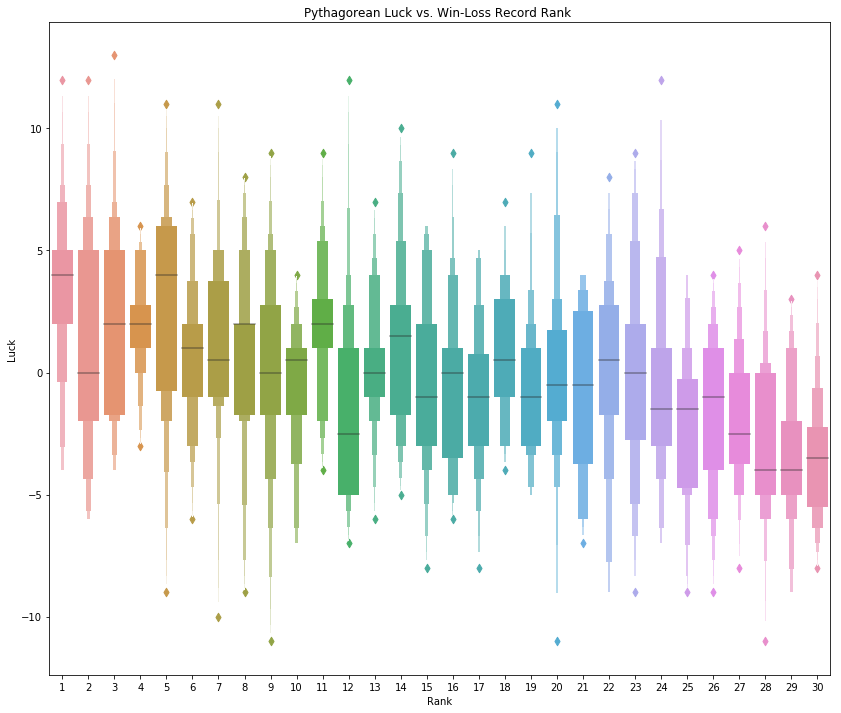

In [20]:
fig, ax = pyplot.subplots(figsize=(14,12))
boxplot2 = sns.boxenplot(data=df,x='Rank',y='Luck')
title('Pythagorean Luck vs. Win-Loss Record Rank ')
fig = boxplot2.get_figure()
fig.savefig('Pythagorean Luck and Rank')

### What I see here is "tiers" forming between the teams. For example, there is a decrease in luck between the first and second team, suggesting that they are both equally skilled, with the only difference between them being a bit of luck (or clutch hitting and relief pitching).  However, they are clearly above the 3rd and 4th teams, which are actually a bit luckier than the second team.  
### This same trend appears at the bottom of the league, as the 22nd through 27th teams appear to be luckier than the bottom three teams.  Perhaps every team ranked below 22nd is approximately equally "bad", but the bottom few teams are particularly bad at winning close games (or unlucky).